In [1]:
%matplotlib notebook

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import sys

In [4]:
# sys.path.append("/home/astro/atlas-phase-curves/atlas-phase-curves/tools")
sys.path.append("/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools")
import database_tools as dbt
import importlib
importlib.reload(dbt)

<module 'database_tools' from '/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools/database_tools.py'>

In [33]:
fname1="atlas_phase_fits_orbs_26_8_2021.csv" # contains dophot obs only up to mjd = 59259 (2021-02-14)
# fname2="atlas_phase_fits_orbs_24_11_2021.csv" # contains more data, up to mjd = 59542 (2021-11-24)

# fname1="atlas_phase_fits_orbs_22_2_2022.csv" # contains more data, up to mjd = 59632 (2022-2-22, if data is in rockAtlas). Uses orbfit_sep_cut of 1 arcsec to reject poor matches of dophot detections to calculated ephemerides
fname2 = "atlas_phase_fits_orbs_22_4_2022.csv" # contains data up to mjd = 59259. Collects apparition data. New conda env installed on jakita

In [44]:
# load the dataframe of our phase fits, including orbital elements columns (astorb)
df1=dbt.load_atlas_phase_fits_orbs(fname1)

In [45]:
df2=dbt.load_atlas_phase_fits_orbs(fname2)

In [46]:
df1

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_app_res_range_2M10_o,phase_curve_app_res_range_3M10_c,phase_curve_app_res_range_3M10_o,phase_curve_app_res_range_B89_c,phase_curve_app_res_range_B89_o,phase_curve_app_res_range_P16_c,phase_curve_app_res_range_P16_o,a_semimajor_axis,e_eccentricity,i_inclination_deg
0,2018-06-01 12:18:01,31.0,13.0,18.0,59242.220336,2021-01-15 04:02:43,2021-01-30 02:22:48,1.0,Ceres,1.0,...,0.000000,NaN,NaN,0.220321,0.000000,0.212194,0.000000,2.765655,0.078394,10.588194
1,NaN,24.0,3.0,20.0,59160.239745,2020-05-24 07:16:19,2020-11-09 13:23:01,2.0,Pallas,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.773779,0.229762,34.898597
2,NaN,45.0,20.0,25.0,59300.540000,2021-06-10 03:45:40,2021-06-12 21:05:18,3.0,Juno,3.0,...,0.155523,0.072645,0.166479,0.047789,0.147802,0.053720,0.152937,2.668151,0.256965,12.991481
3,NaN,12.0,7.0,5.0,59233.510382,2021-01-25 00:07:31,2020-03-17 23:04:16,4.0,Vesta,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.361650,0.088349,7.141462
4,2020-10-20 15:12:33,193.0,49.0,141.0,59349.566586,2021-06-16 22:09:32,2021-06-15 21:02:16,5.0,Astraea,5.0,...,0.161659,0.057884,0.139641,0.040578,0.159526,0.040899,0.161641,2.573926,0.190614,5.367602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434034,NaN,10.0,7.0,3.0,59277.428275,2021-06-10 09:40:14,2021-06-11 09:39:22,506906.0,2008 CK194,553711.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.895502,0.061007,19.145688
434035,NaN,15.0,12.0,3.0,59267.395093,2021-06-10 12:11:55,2021-06-10 20:44:26,549516.0,2011 KP48,603135.0,...,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,3.132320,0.111520,9.487708
434036,NaN,18.0,14.0,4.0,59352.314387,2021-06-17 01:11:09,2021-06-17 06:21:32,550221.0,2012 CK5,613285.0,...,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,2.699094,0.290773,13.435809
434037,NaN,18.0,13.0,5.0,59257.465220,2021-06-10 00:23:51,2021-02-03 07:14:23,551041.0,2012 VB7,624230.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.872771,0.067888,17.850431


In [47]:
df2

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_refresh_date_o,primaryId,updated,N_apparitions,phase_curve_med_H_app_o,phase_curve_med_std_app_o,phase_angle_app_range_o,a_semimajor_axis,e_eccentricity,i_inclination_deg
0,2018-06-01 12:18:01,31.0,13.0,18.0,59407.601574,2021-07-18 00:12:17,2021-01-30 02:22:48,1.0,Ceres,1.0,...,2022-04-21 21:23:25,1050692.0,1.0,4.0,NaN,NaN,NaN,2.766043,0.078501,10.587683
1,NaN,24.0,3.0,20.0,59552.342604,2021-07-17 23:44:00,2021-12-06 00:36:52,2.0,Pallas,2.0,...,2022-04-21 21:23:25,1050693.0,NaN,4.0,NaN,NaN,NaN,2.771107,0.229993,34.925229
2,NaN,45.0,20.0,25.0,59522.219884,2021-11-06 02:37:18,2021-10-03 05:16:15,3.0,Juno,3.0,...,2022-04-21 21:23:25,1050694.0,NaN,5.0,NaN,NaN,NaN,2.668791,0.256887,12.991859
3,NaN,12.0,7.0,5.0,59237.640567,2021-01-25 00:07:31,2020-03-17 23:04:16,4.0,Vesta,4.0,...,2022-04-21 21:23:25,1050695.0,NaN,4.0,NaN,NaN,NaN,2.361266,0.088234,7.141634
4,2020-10-20 15:12:33,193.0,49.0,141.0,59523.221898,2021-10-28 06:57:58,2021-11-07 05:00:57,5.0,Astraea,5.0,...,2022-04-21 21:23:25,1050696.0,1.0,5.0,0.056993,0.126805,2.2061,2.575177,0.190099,5.367632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445223,NaN,0.0,2.0,3.0,59592.411308,2022-01-11 07:09:56,2022-01-15 03:37:33,606054.0,2017 EV11,710194.0,...,NaN,1512837.0,NaN,NaN,NaN,NaN,NaN,3.170245,0.219094,15.490498
445224,NaN,0.0,2.0,5.0,59600.513958,2022-01-09 03:49:56,2022-01-23 02:27:38,NaN,2017 FM9,710548.0,...,NaN,1512838.0,NaN,NaN,NaN,NaN,NaN,3.191048,0.151347,25.968059
445225,NaN,0.0,0.0,2.0,59561.431331,NaN,2021-12-15 03:53:03,NaN,2017 FN56,711221.0,...,NaN,1512839.0,NaN,NaN,NaN,NaN,NaN,3.460275,0.062986,10.930850
445226,NaN,0.0,0.0,4.0,59593.339954,NaN,2022-01-16 02:01:49,NaN,2017 HK50,712974.0,...,NaN,1512840.0,NaN,NaN,NaN,NaN,NaN,3.170500,0.262379,13.996887


In [48]:
# last detection date tracks the whole rockatlas db, not just what we chose to fit
print(np.amax(df1["last_detection_mjd"]),np.amax(df2["last_detection_mjd"]))

59386.559144 59600.673032


In [49]:
print(df1[df1["name"]=="Numerowia"].iloc[0].to_string())

dateLastModified                    2020-10-20 15:19:07
detection_count                                  1064.0
detection_count_c                                 315.0
detection_count_o                                 730.0
last_detection_mjd                         59386.302812
last_photometry_update_date_c       2021-06-19 21:57:12
last_photometry_update_date_o       2021-06-23 04:46:04
mpc_number                                       1206.0
name                                          Numerowia
orbital_elements_id                              1206.0
phase_angle_range_c                             18.7593
phase_angle_range_o                             18.9262
phase_curve_G12_2M10_c                        -0.471845
phase_curve_G12_2M10_o                         0.075277
phase_curve_G12_P16_c                         -0.575896
phase_curve_G12_P16_o                         -0.047732
phase_curve_G12_err_2M10_c                     0.105844
phase_curve_G12_err_2M10_o                     0

In [50]:
print(df2[df2["name"]=="Numerowia"].iloc[0].to_string())

dateLastModified                  2020-10-20 15:19:07
detection_count                                1064.0
detection_count_c                               315.0
detection_count_o                               730.0
last_detection_mjd                       59424.264931
last_photometry_update_date_c     2021-08-19 04:55:23
last_photometry_update_date_o     2021-08-18 14:49:04
mpc_number                                     1206.0
name                                        Numerowia
orbital_elements_id                            1206.0
phase_angle_range_c                           18.7593
phase_angle_range_o                           18.9262
phase_curve_G12_2M10_c                      -0.309319
phase_curve_G12_2M10_o                       0.075174
phase_curve_G12_P16_c                       -0.576211
phase_curve_G12_P16_o                          -0.048
phase_curve_G12_err_2M10_c                   0.096767
phase_curve_G12_err_2M10_o                   0.073502
phase_curve_G12_err_P16_c   

In [51]:
# use only good objects:

good_mask_B89_o_1 = ((df1["phase_curve_N_fit_B89_o"]>=100) & 
                      (df1["phase_curve_N_alpha_low_B89_o"]>0) &
                     (df1["phase_curve_G_err_B89_o"]<=0.2) &
                 (df1["phase_curve_H_err_B89_o"]<=0.05))

good_mask_B89_o_2 = ((df2["phase_curve_N_fit_B89_o"]>=100) & 
                      (df2["phase_curve_N_alpha_low_B89_o"]>0) &
                     (df2["phase_curve_G_err_B89_o"]<=0.2) &
                 (df2["phase_curve_H_err_B89_o"]<=0.05))

df1 = df1[good_mask_B89_o_1]
df2 = df2[good_mask_B89_o_2]

print(len(df1),len(df2))

98274 87083


In [40]:
# np.isin is very slow for large lists of strings
# set up a subset of each dataframe to compare

_df1=pd.DataFrame(df1[["name","mpc_number"]].copy())
_df1["df"]="df1"
print(_df1)

_df2=pd.DataFrame(df2[["name","mpc_number"]].copy())
_df2["df"]="df2"
print(_df2)

# create a dataframe that contains all unique names, and the dataframe that they occur in
df_diff = pd.concat([_df1,_df2]).drop_duplicates(subset=["name"],keep=False)
print(len(df_diff))

              name  mpc_number   df
18         Fortuna        19.0  df1
23          Themis        24.0  df1
25      Proserpina        26.0  df1
32      Polyhymnia        33.0  df1
33           Circe        34.0  df1
...            ...         ...  ...
433181   2013 NN21    511004.0  df1
433187    2013 PY6         NaN  df1
433260   2013 SB52    552079.0  df1
433613    2015 PU1         NaN  df1
433765  2015 VY125    516140.0  df1

[98274 rows x 3 columns]
              name  mpc_number   df
18         Fortuna        19.0  df2
23          Themis        24.0  df2
25      Proserpina        26.0  df2
32      Polyhymnia        33.0  df2
33           Circe        34.0  df2
...            ...         ...  ...
432188   2009 QQ22         NaN  df2
432239   2009 SF20    509948.0  df2
432548     2010 LS         NaN  df2
433182   2013 NN21    511004.0  df2
433188    2013 PY6         NaN  df2

[87083 rows x 3 columns]
13413


In [41]:
# names that occur in only ONE of the dataframes df1 and df2
df_diff

,name,mpc_number,df
1205,Numerowia,1206.0,df1
2176,Fogelin,2181.0,df1
3074,Martinuboh,3081.0,df1
3488,Arieso,3496.0,df1
3490,Belton,3498.0,df1
...,...,...,...
355380,2004 TZ202,217373.0,df2
380005,2001 XP49,194539.0,df2
388115,2002 JM5,280120.0,df2
412774,2004 FF29,NaN,df2


In [42]:
df_diff[df_diff["df"]=="df1"]

,name,mpc_number,df
1205,Numerowia,1206.0,df1
2176,Fogelin,2181.0,df1
3074,Martinuboh,3081.0,df1
3488,Arieso,3496.0,df1
3490,Belton,3498.0,df1
...,...,...,...
428650,2009 QN45,448396.0,df1
432176,2009 QB3,NaN,df1
433260,2013 SB52,552079.0,df1
433613,2015 PU1,NaN,df1


In [43]:
# these objects are all new to df2
df_diff[df_diff["df"]=="df2"]

,name,mpc_number,df
41,Isis,42.0,df2
4184,Morpheus,4197.0,df2
4436,Pan,4450.0,df2
5374,Shosasaki,5395.0,df2
7023,Van Dokkum,7059.0,df2
...,...,...,...
355380,2004 TZ202,217373.0,df2
380005,2001 XP49,194539.0,df2
388115,2002 JM5,280120.0,df2
412774,2004 FF29,NaN,df2


In [32]:
# check numbers add up
print(len(df1)+len(df_diff),len(df2))

125485 87083


In [18]:
new_names = df_diff["name"]

In [19]:
df_new = df2[np.isin(df2["name"],new_names)][["name","mpc_number","detection_count","last_photometry_update_date_o"]]

In [20]:
df_new

,name,mpc_number,detection_count,last_photometry_update_date_o
434006,2000 GR148,152979.0,19.0,2021-06-10 20:57:41
434008,2002 RK210,183134.0,32.0,2021-06-11 09:38:30
434009,2000 AC226,192944.0,33.0,2021-06-11 09:28:29
434011,2006 TT64,216185.0,34.0,2021-06-11 14:12:01
434012,2004 BE40,220464.0,19.0,2021-06-10 22:52:52
...,...,...,...,...
434907,2004 NM23,399628.0,141.0,2021-06-23 04:31:05
434908,2010 JQ168,403555.0,116.0,2021-06-23 04:42:45
434909,2003 WL15,413323.0,108.0,2021-06-23 04:25:09
434910,2010 KT122,477615.0,88.0,2021-06-23 04:23:06


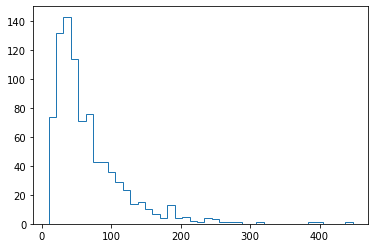

In [21]:
x=plt.hist(df_new["detection_count"], bins = "auto", histtype = "step")

These new objects probably had not enough detections to get a fit before, more data has come in since Feb 14th 2021

Also some object have been added to the rockAtlas tracking?

# Merge the two datasets and compare

In [22]:
df = df1.merge(df2, on="name", suffixes=('_1', '_2'))

In [23]:
df

,dateLastModified_1,detection_count_1,detection_count_c_1,detection_count_o_1,last_detection_mjd_1,last_photometry_update_date_c_1,last_photometry_update_date_o_1,mpc_number_1,name,orbital_elements_id_1,...,phase_curve_app_res_range_2M10_o_2,phase_curve_app_res_range_3M10_c_2,phase_curve_app_res_range_3M10_o_2,phase_curve_app_res_range_B89_c_2,phase_curve_app_res_range_B89_o_2,phase_curve_app_res_range_P16_c_2,phase_curve_app_res_range_P16_o_2,a_semimajor_axis_2,e_eccentricity_2,i_inclination_deg_2
0,2018-06-01 12:18:01,31.0,13.0,18.0,59242.220336,2021-01-15 04:02:43,2021-01-30 02:22:48,1.0,Ceres,1.0,...,0.000000,NaN,NaN,0.182496,0.000000,0.175858,0.000000,2.765800,0.078433,10.588051
1,NaN,24.0,3.0,20.0,59160.239745,2020-05-24 07:16:19,2020-11-09 13:23:01,2.0,Pallas,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.772598,0.229884,34.916328
2,NaN,45.0,20.0,25.0,59300.540000,2021-06-10 03:45:40,2021-06-12 21:05:18,3.0,Juno,3.0,...,0.195478,0.066292,0.193975,0.071021,0.196508,0.070010,0.195824,2.668403,0.256938,12.991527
3,NaN,12.0,7.0,5.0,59233.510382,2021-01-25 00:07:31,2020-03-17 23:04:16,4.0,Vesta,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.361377,0.088273,7.141525
4,2020-10-20 15:12:33,193.0,49.0,141.0,59349.566586,2021-06-16 22:09:32,2021-06-15 21:02:16,5.0,Astraea,5.0,...,0.161485,0.000789,0.143725,0.074834,0.160929,0.065387,0.161432,2.574437,0.190406,5.367634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434034,NaN,10.0,7.0,3.0,59277.428275,2021-06-10 09:40:14,2021-06-11 09:39:22,506906.0,2008 CK194,553711.0,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.895354,0.060963,19.145849
434035,NaN,15.0,12.0,3.0,59267.395093,2021-06-10 12:11:55,2021-06-10 20:44:26,549516.0,2011 KP48,603135.0,...,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,3.131926,0.111453,9.488437
434036,NaN,18.0,14.0,4.0,59352.314387,2021-06-17 01:11:09,2021-06-17 06:21:32,550221.0,2012 CK5,613285.0,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.698835,0.290697,13.435937
434037,NaN,18.0,13.0,5.0,59257.465220,2021-06-10 00:23:51,2021-02-03 07:14:23,551041.0,2012 VB7,624230.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.872604,0.067884,17.850584


In [24]:
# clear some memory because ubuntu laptop smol
# del df1
# del df2
# del df

In [25]:
delta_detections = df["detection_count_2"] - df["detection_count_1"]

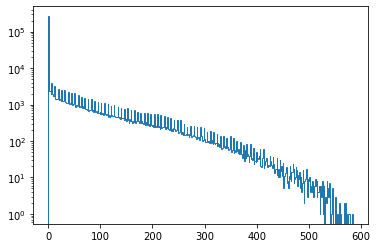

In [26]:
x=plt.hist(delta_detections, bins="auto", histtype="step", log=True)

In [27]:
# fraction of objects with 0 new detections
len(delta_detections[delta_detections==0])/len(delta_detections)

0.6028767000200442

Most objects have zero new detections since Feb 14th, some have significantly more. Note the picket fence pattern, extra detections are grouped in tracklets of 4?

Reassuringly none have fewer detections...

In [113]:
mask1 = ((df1["phase_curve_N_fit_B89_o"]>=100) & 
        (df1["phase_curve_N_alpha_low_B89_o"]>=1))
mask2 = ((df2["phase_curve_N_fit_B89_o"]>=100) & 
        (df2["phase_curve_N_alpha_low_B89_o"]>=1))

# mask1 = ((df1["phase_curve_N_fit_B89_o"]>=100))
# mask2 = ((df2["phase_curve_N_fit_B89_o"]>=100))

In [114]:
H_err_cut=0.2
G_err_cut=0.4
_mask1 = (mask1 & (df1["phase_curve_H_err_B89_o"]<=H_err_cut) & (df1["phase_curve_G_err_B89_o"]<=G_err_cut))
_mask2 = (mask2 & (df2["phase_curve_H_err_B89_o"]<=H_err_cut) & (df2["phase_curve_G_err_B89_o"]<=G_err_cut))

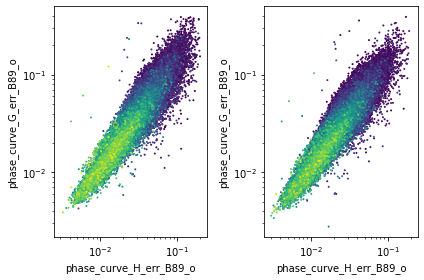

In [115]:
x_plot = "phase_curve_H_err_B89_o"
y_plot = "phase_curve_G_err_B89_o"
c_plot = "phase_curve_N_fit_B89_o"

fig = plt.figure()
# fig.set_size_inches(10,4)
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1],sharex=ax1,sharey=ax1)

# df_plot1 = df1[mask1].sort_values(c_plot)
# df_plot2 = df2[mask2].sort_values(c_plot)
df_plot1 = df1[_mask1].sort_values(c_plot)
df_plot2 = df2[_mask2].sort_values(c_plot)

ax1.scatter(df_plot1[x_plot], df_plot1[y_plot],c=df_plot1[c_plot],s=1)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

ax2.scatter(df_plot2[x_plot], df_plot2[y_plot],c=df_plot2[c_plot],s=1)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlabel(x_plot)
ax2.set_ylabel(y_plot)

plt.tight_layout()
plt.show()

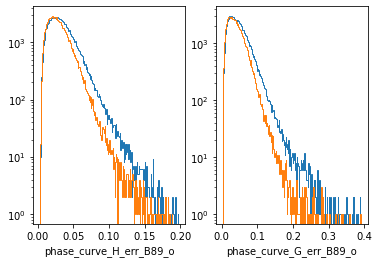

In [116]:
x_plot = "phase_curve_H_err_B89_o"
y_plot = "phase_curve_G_err_B89_o"

fig = plt.figure()
# fig.set_size_inches(10,4)
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

# df_plot1 = df1[mask1]
# df_plot2 = df2[mask2]
# bins = np.linspace(0,0.5)

df_plot1 = df1[_mask1]
df_plot2 = df2[_mask2]
bins= "auto"

ax1.hist(df_plot1[x_plot],log=True, histtype = "step", bins = bins, label="df1")
ax1.hist(df_plot2[x_plot],log=True, histtype = "step", bins = bins, label="df2")
ax1.set_xlabel(x_plot)

ax2.hist(df_plot1[y_plot],log=True, histtype = "step", bins = bins)
ax2.hist(df_plot2[y_plot],log=True, histtype = "step", bins = bins)
ax2.set_xlabel(y_plot)

plt.show()

In [117]:
len(df1),len(df2)

(434039, 434912)

In [118]:
print(len(df1[_mask1]),len(df2[_mask2]))
print(len(df1[_mask1])-len(df2[_mask2]))

118011 117124
887


The second run which has more data actually has fewer acceptable fits after cuts? Is this due to more objects exhibiting things like apparition effects over a longer baseline?

Loss of objects when  data points at low phase angle are lost?

# look at apparitions

In [119]:
# cut by q<1.3 (NEO) where our simple apparition counter breaks down
df1["q"] = df1["a_semimajor_axis"]*(1.0 - df1["e_eccentricity"])
df2["q"] = df2["a_semimajor_axis"]*(1.0 - df2["e_eccentricity"])

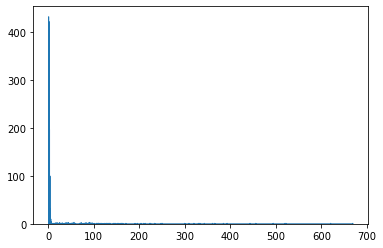

In [120]:
x = plt.hist(df1["N_apparitions"][(~np.isnan(df1["N_apparitions"])) &
                                   (df1["q"]<1.3)], bins = "auto", histtype = "step")

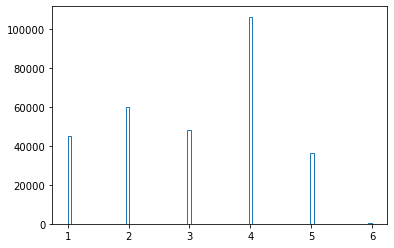

In [121]:
x = plt.hist(df1["N_apparitions"][(~np.isnan(df1["N_apparitions"])) &
                                   (df1["q"]>1.3)], bins = "auto", histtype = "step")

In [122]:
df1[["mpc_number","N_apparitions"]][(~np.isnan(df1["N_apparitions"])) &
                                   (df1["q"]>1.3)].sort_values("N_apparitions")

,mpc_number,N_apparitions
434037,551041.0,1.0
344076,129448.0,1.0
344075,129395.0,1.0
344074,129346.0,1.0
344068,128882.0,1.0
...,...,...
32315,32435.0,6.0
54472,54672.0,6.0
30921,31037.0,6.0
32300,32420.0,6.0


In [123]:
df1[["mpc_number","N_apparitions","detection_count","a_semimajor_axis"]][np.isnan(df1["N_apparitions"])].sort_values("detection_count")

,mpc_number,N_apparitions,detection_count,a_semimajor_axis
324246,NaN,NaN,1.0,2.608450
325254,542656.0,NaN,1.0,2.548892
399751,381253.0,NaN,1.0,3.177188
399743,381152.0,NaN,1.0,2.640371
399740,381095.0,NaN,1.0,2.402590
...,...,...,...,...
48670,48847.0,NaN,348.0,1.936370
327795,NaN,NaN,360.0,2.494087
318487,NaN,NaN,451.0,2.597797
327724,NaN,NaN,535.0,8.471828


In [124]:
df["delta_N_apparitions"] = df["N_apparitions_2"] - df["N_apparitions_1"]
df["delta_H_err"] = df["phase_curve_H_err_B89_o_2"] - df["phase_curve_H_err_B89_o_1"]
df["delta_G_err"] = df["phase_curve_G_err_B89_o_2"] - df["phase_curve_G_err_B89_o_1"]
df["delta_N_fit"] = df["phase_curve_N_fit_B89_o_2"] - df["phase_curve_N_fit_B89_o_1"]

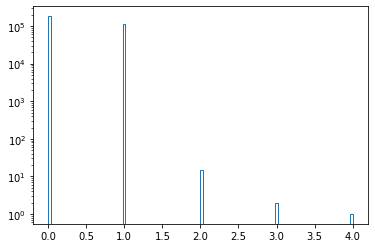

In [125]:
x=plt.hist(df["delta_N_apparitions"], bins="auto", histtype="step", log=True)

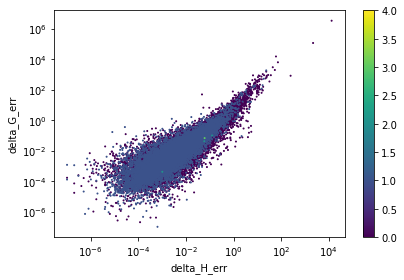

In [126]:
x_plot = "delta_H_err"
y_plot = "delta_G_err"
c_plot = "delta_N_apparitions"

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

df_plot = df.sort_values(c_plot)

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],c=df_plot[c_plot],s=1)
cbar = fig.colorbar(s1)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

plt.tight_layout()
plt.show()

Most objects have improved errors

In [127]:
# find the objects that are missing from the df2 good phase fits

_df1=pd.DataFrame(df1[_mask1][["name","mpc_number"]].copy())
_df1["df"]="df1"
print(_df1)

_df2=pd.DataFrame(df2[_mask2][["name","mpc_number"]].copy())
_df2["df"]="df2"
print(_df2)

# create a dataframe that contains all unique names, and the dataframe that they occur in
df_good_diff = pd.concat([_df1,_df2]).drop_duplicates(subset=["name"],keep=False)

              name  mpc_number   df
11        Victoria        12.0  df1
18         Fortuna        19.0  df1
23          Themis        24.0  df1
25      Proserpina        26.0  df1
31          Pomona        32.0  df1
...            ...         ...  ...
433181   2013 NN21    511004.0  df1
433187    2013 PY6         NaN  df1
433260   2013 SB52    552079.0  df1
433613    2015 PU1         NaN  df1
433765  2015 VY125    516140.0  df1

[118011 rows x 3 columns]
              name  mpc_number   df
11        Victoria        12.0  df2
18         Fortuna        19.0  df2
22          Thalia        23.0  df2
23          Themis        24.0  df2
25      Proserpina        26.0  df2
...            ...         ...  ...
434389    2003 HB6    326732.0  df2
434587  2007 TF170    406420.0  df2
434608   2007 VC11    410352.0  df2
434860    2012 OC4    507413.0  df2
434903    2007 OB4    312000.0  df2

[117124 rows x 3 columns]


In [128]:
df_good_diff[df_good_diff["df"]=="df1"]

,name,mpc_number,df
2176,Fogelin,2181.0,df1
2324,Orthos,2329.0,df1
2362,Beltrovata,2368.0,df1
3488,Arieso,3496.0,df1
5836,Tara,5863.0,df1
...,...,...,...
428650,2009 QN45,448396.0,df1
430597,2009 QT40,484885.0,df1
432260,2009 SE150,529173.0,df1
433260,2013 SB52,552079.0,df1


In [130]:
name = "Fogelin"

In [131]:
df[df["name"]==name][["name","delta_N_apparitions","delta_H_err","delta_G_err","delta_N_fit","phase_curve_N_fit_B89_o_2"]]

,name,delta_N_apparitions,delta_H_err,delta_G_err,delta_N_fit,phase_curve_N_fit_B89_o_2
2176,Fogelin,1.0,-0.001674,-0.002791,-6.0,742.0


In [132]:
params = ["name","N_apparitions","detection_count_o",
          "phase_curve_H_err_B89_o","phase_curve_G_err_B89_o",
                                             "phase_curve_N_fit_B89_o","phase_curve_N_alpha_low_B89_o"]

In [133]:
df1[df1["name"]==name][params]
# df1[_mask1][df1[_mask1]["name"]==name][params]

,name,N_apparitions,detection_count_o,phase_curve_H_err_B89_o,phase_curve_G_err_B89_o,phase_curve_N_fit_B89_o,phase_curve_N_alpha_low_B89_o
2176,Fogelin,4.0,816.0,0.023786,0.027823,748.0,3.0


In [134]:
df2[df2["name"]==name][params]

,name,N_apparitions,detection_count_o,phase_curve_H_err_B89_o,phase_curve_G_err_B89_o,phase_curve_N_fit_B89_o,phase_curve_N_alpha_low_B89_o
2176,Fogelin,5.0,972.0,0.022112,0.025032,742.0,0.0


An additional apparition can change the number of data points being cut, including the number of data points at low phase angle, even if the object has more detections.
Due to apparition effect?

Note that we have also added the orbfit_sep_cut between df1 and df2, therefore we expect different data points to be cut.